## Prawesh Dahal
### Speech Emotion Recognition
#### Part I - SVM 

In [20]:
import numpy as np
import librosa
import scipy
from scipy.io import wavfile
import os, time, csv, datetime
from librosa import display
import matplotlib.pyplot as plt 
from numpy import diff
import pyworld as pw
import h5py

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix 

 

In [21]:
#Get inside directory 
parent_dir = os.getcwd()
dataset_dir = os.path.join(parent_dir,'RAVDESS')
print(dataset_dir)

C:\Users\Prawesh\Insync\COLUMBIA 2023\Spring 2019\ELEN 6820 Speech Proc\RAVDESS


In [22]:
length_wave_max = 85346 #maximum length of the audio waves
 
emo_label ={0: 'neutral', 1:'calm', 2: 'happy',
            3: 'sad',   4: 'angry', 5: 'fearful',
            6: 'disgust', 7: 'surprise'}

features = []
labels  = []
max_frame_len = 442 #maximum length of the audio waves
emotionset = [0,1, 2, 3, 4, 5, 6, 7]

### Split individual emotions (neutral, happy, sad, angry) in equal training (70%), validation(10%) and test (30%) sets

In [23]:
totalem = range(len(emotionset))
tr_wave = []
tr_lab = []
val_wave = []
val_lab = []
test_wave = []
test_lab = []

for emnum in totalem:   

    _waveform = []
    _labels  = []
    emotion = emotionset[emnum]
    print(emotion)
    print('Reading emotion #' + str(emotion) + ' :' + emo_label[emotion] + '...')
    
    emotion_dir = os.path.join(dataset_dir, str(emotion))
    print(emotion_dir)
    
    file_list = os.listdir(emotion_dir)
    sett = range(len(file_list))
    
    for filenum in sett:
        
        #Load the dataset 
        y, sr = librosa.load(os.path.join(emotion_dir, file_list[filenum]),dtype=np.float32) 
        
        # truncate or zero-pad the signal
        y = y[:length_wave_max]
        if len(y) < length_wave_max:
            y = np.concatenate([y, np.zeros(length_wave_max-len(y))])
            
        _waveform.append(y)
        _labels.append(emotion)
        
        waveform = np.array(_waveform)
        labels = np.array(_labels)

    X_train, X_test, y_train, y_test = train_test_split(waveform, labels, test_size=0.2, random_state=10) 
#     X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=10) 
    
    print('Train',X_train.shape)
    tr_wave.append(X_train)
    tr_lab.append(y_train)
    
#     print('Val',X_val.shape)
#     val_wave.append(X_val)
#     val_lab.append(y_val)
    
    print('Test',X_test.shape)
    test_wave.append(X_test)
    test_lab.append(y_test)
 

0
Reading emotion #0 :neutral...
C:\Users\Prawesh\Insync\COLUMBIA 2023\Spring 2019\ELEN 6820 Speech Proc\RAVDESS\0
Train (76, 85346)
Test (20, 85346)
1
Reading emotion #1 :calm...
C:\Users\Prawesh\Insync\COLUMBIA 2023\Spring 2019\ELEN 6820 Speech Proc\RAVDESS\1
Train (153, 85346)
Test (39, 85346)
2
Reading emotion #2 :happy...
C:\Users\Prawesh\Insync\COLUMBIA 2023\Spring 2019\ELEN 6820 Speech Proc\RAVDESS\2
Train (153, 85346)
Test (39, 85346)
3
Reading emotion #3 :sad...
C:\Users\Prawesh\Insync\COLUMBIA 2023\Spring 2019\ELEN 6820 Speech Proc\RAVDESS\3
Train (153, 85346)
Test (39, 85346)
4
Reading emotion #4 :angry...
C:\Users\Prawesh\Insync\COLUMBIA 2023\Spring 2019\ELEN 6820 Speech Proc\RAVDESS\4
Train (153, 85346)
Test (39, 85346)
5
Reading emotion #5 :fearful...
C:\Users\Prawesh\Insync\COLUMBIA 2023\Spring 2019\ELEN 6820 Speech Proc\RAVDESS\5
Train (153, 85346)
Test (39, 85346)
6
Reading emotion #6 :disgust...
C:\Users\Prawesh\Insync\COLUMBIA 2023\Spring 2019\ELEN 6820 Speech Proc\R

#### Final sets of training, validation and tests waveforms

Total Training set (1147, 85346)
Total Test set (293, 85346)


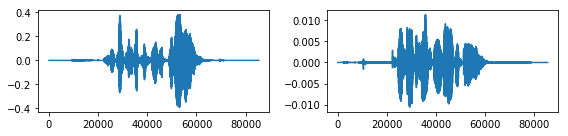

In [25]:
#Concatenate all training, validate and test for all emotions
tr_w = np.array(tr_wave); tr_w = np.vstack((tr_w[0], tr_w[1], tr_w[2], tr_w[3], tr_w[4], tr_w[5], tr_w[6], tr_w[7] ))
tr_l = np.array(tr_lab);  tr_l = np.hstack((tr_l[0], tr_l[1], tr_l[2], tr_l[3], tr_l[4], tr_l[5], tr_l[6], tr_l[7] )) 
print('Total Training set',tr_w.shape) 

# val_w = np.array(val_wave); val_w = np.vstack((val_w[0], val_w[1], val_w[2], val_w[3]))
# val_l = np.array(val_lab);  val_l = np.hstack((val_l[0], val_l[1], val_l[2], val_l[3])) 
# print('Total Validation set',val_w.shape) 

test_w = np.array(test_wave); test_w = np.vstack((test_w[0], test_w[1], test_w[2], test_w[3], test_w[4], test_w[5], test_w[6], test_w[7] ))
test_l = np.array(test_lab);  test_l = np.hstack((test_l[0], test_l[1], test_l[2], test_l[3], test_l[4], test_l[5], test_l[6], test_l[7] )) 
print('Total Test set',test_w.shape) 

plt.figure(1, figsize=(8,2))
plt.subplot(121); plt.plot(tr_w[334,:])
plt.subplot(122); plt.plot(test_w[100,:])
plt.tight_layout()

#### Feature Extraction for each sets

Feature Extraction for Training Set 0


C:\Users\Prawesh\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Feature Extraction for Test Set 1


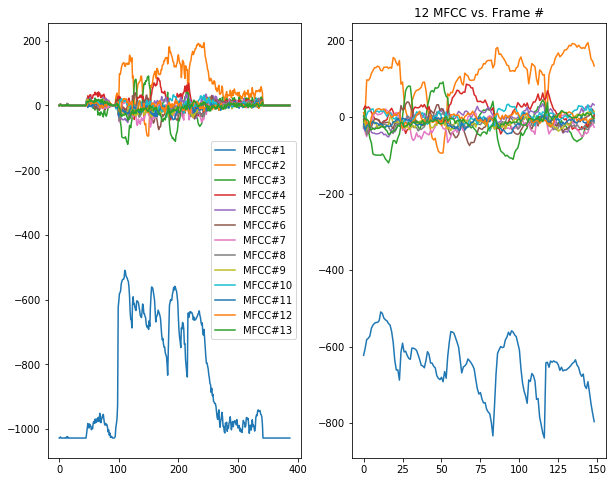

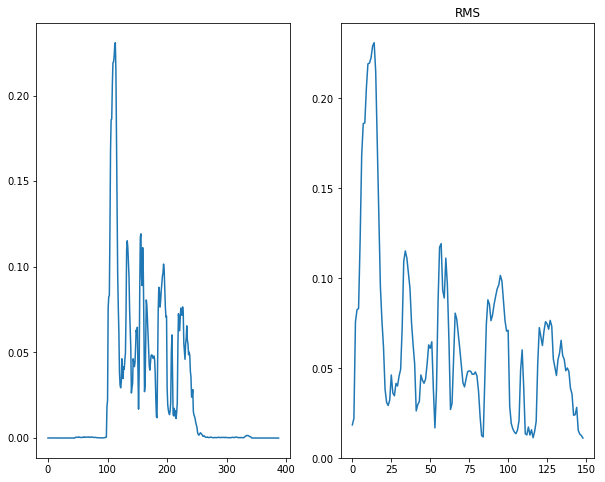

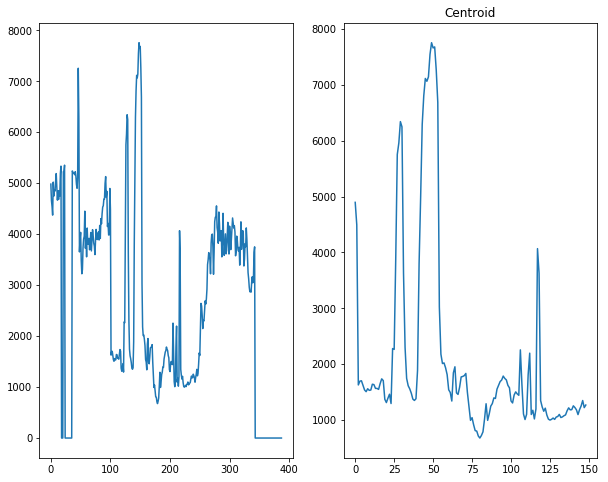

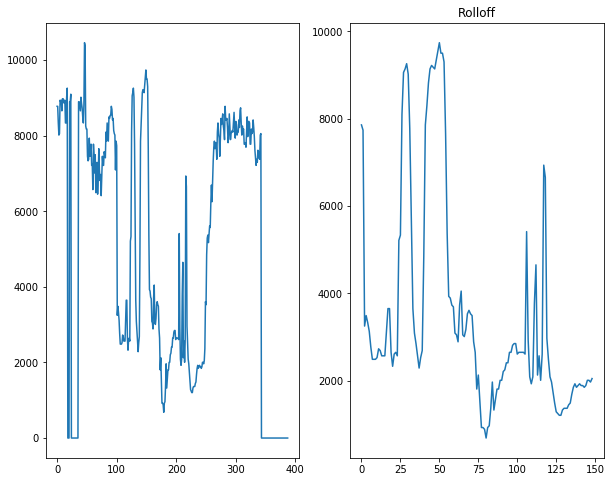

In [26]:
#Calculate spectrogram for each set
#Frame and hop length
frame_t = 0.025 #25ms 
frame_n = round(sr*frame_t) 
hop_n = round(0.01*sr) #10ms 

tr_features = []; tr_labels  = []
test_features = []; test_labels = [] 

for sets in range(2): 
    if sets == 0:
        mydata = tr_w
        print('Feature Extraction for Training Set', sets)
    if sets == 1:
        mydata = test_w
        print('Feature Extraction for Test Set', sets)
    
     
    for wavs in range(len(mydata)): 
        
        y = mydata[wavs,:]   
 
        mfcc_num = 13 
        Ethresh = 0.01
#----------------------------------------------------------

        #RMSE per frame
        S, phase = librosa.magphase(librosa.stft(y=y,win_length=frame_n, hop_length=hop_n))
        rmst = (librosa.feature.rmse(S=S,frame_length=frame_n, hop_length=hop_n))
        
        Elocs = np.where(rmst>Ethresh)[1] #all places where greater than 0.05
        Eloc = np.arange(Elocs[0],Elocs[-1]+1) #only chop off ends, keep middle zeros for silence frames
        rms = rmst[:,Eloc]
        
#----------------------------------------------------------
        #MFCC per frame
        MFCCt = librosa.feature.mfcc(y=y, sr=sr, n_fft=frame_n, hop_length=hop_n, n_mfcc=mfcc_num)
        MFCC = MFCCt[:, Eloc]
#         print('Shape of MFCC', MFCC.shape)

#----------------------------------------------------------
        _cent = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=frame_n, hop_length=hop_n)
        cent = _cent[:,Eloc]
#----------------------------------------------------------

        _rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, n_fft=frame_n, hop_length=hop_n)
        rolloff = _rolloff[:,Eloc]
#---------------------------------------------------------
        
        #Zero Crossing Rate per frame
        zcrt = librosa.feature.zero_crossing_rate(y=y, frame_length=frame_n, hop_length=hop_n)
        zcr = zcrt[:,Eloc]
#----------------------------------------------------------
 
        #Plot the sample features 
        if sets == 0 and wavs == 0:
            plt.figure(1, figsize=(10,8))
            for i in range(13):
                plt.subplot(121)
                plt.plot(MFCCt[i,:],label="MFCC#{}".format(i+1))
                plt.legend()
                plt.subplot(122)
                plt.plot(MFCC[i,:],label="MFCC#{}".format(i+1))
                plt.title('12 MFCC vs. Frame #')
                
                
            plt.figure(2, figsize=(10,8))
            plt.subplot(121)
            plt.plot(rmst[0,:],label='ZCR')
            plt.subplot(122)
            plt.plot(rms[0,:],label='ZCR')
            plt.title('RMS')
            
            plt.figure(3, figsize=(10,8))
            plt.subplot(121)
            plt.plot(_cent[0,:],label='ZCR')
            plt.subplot(122)
            plt.plot(cent[0,:],label='ZCR')
            plt.title('Centroid')
            
            plt.figure(4, figsize=(10,8))
            plt.subplot(121)
            plt.plot(_rolloff[0,:],label='ZCR')
            plt.subplot(122)
            plt.plot(rolloff[0,:],label='ZCR')
            plt.title('Rolloff')
            
#-------------------------------------------------------
        #Find mean across all frames
        MFCC = np.mean(MFCC, axis=1)
        zcr = np.mean(zcr, axis =1)
        rms = np.mean(rms, axis =1)
        cent = np.mean(cent, axis =1)
        rolloff = np.mean(rolloff, axis=1)  
#-------------------------------------------------------

        MFCC = np.reshape(MFCC, (len(MFCC),1)) 
        zcr = np.reshape(zcr, (len(zcr),1)) 
        rms = np.reshape(rms, (len(rms),1)) 
        cent = np.reshape(cent, (len(cent),1)) 
        rolloff = np.reshape(rolloff, (len(rolloff),1))
        
#----------------------------------------------------------     

        concat = np.vstack((MFCC,zcr, rms, cent, rolloff))
        
        if sets == 0:
           tr_features.append(concat[:,0])   
           tr_labels.append(tr_l[wavs])
        if sets == 1: 
           test_features.append(concat[:,0])
           test_labels.append(test_l[wavs])
                                   

Train -Audio x Features x Frames (1147, 17)
Train -Labels of audio (1147,)
Test -Audio x Features x Frames (293, 17)
Test -Labels of audio (293,)


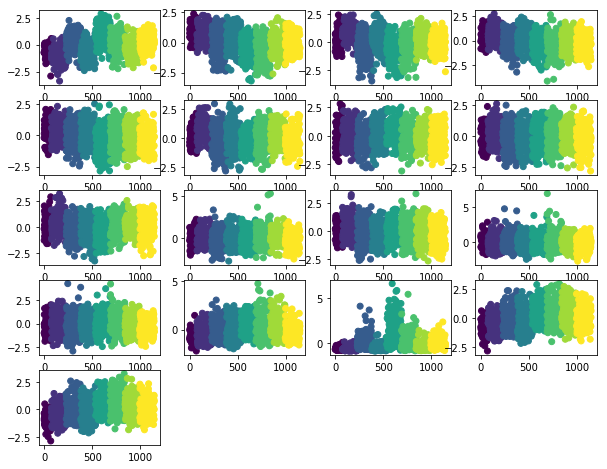

In [27]:
tr_fea = np.array(tr_features); tr_lab = np.array(tr_labels)
print('Train -Audio x Features x Frames',tr_fea.shape)
print('Train -Labels of audio',(tr_lab.shape))  

test_fea = np.array(test_features); test_lab = np.array(test_labels)
print('Test -Audio x Features x Frames',test_fea.shape)
print('Test -Labels of audio',(test_lab.shape))  

#Normalize the training features: 
scaler = preprocessing.StandardScaler().fit(tr_fea)
tr_fea = scaler.transform(tr_fea) 

for i in range(tr_fea.shape[1]): 
    plt.figure(1, figsize=(10,8))
    plt.subplot(5,4,i+1)
    plt.scatter(np.arange(tr_fea.shape[0]),tr_fea[:,i],c=tr_lab); 
 

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Training Score 0.6530078465562337
Score 0.5631399317406144
Accuracy 0.5631399317406144
[1 1 0 0 0 0 1 0 0 0 0 6 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 3 1 0 1 1 5 1
 1 1 1 1 1 1 0 0 0 7 1 1 0 1 1 0 1 1 0 1 1 0 7 0 2 2 2 2 2 0 2 2 2 2 2 2 5
 1 0 2 5 7 2 0 2 7 2 2 2 4 2 2 2 2 5 6 4 2 6 2 0 6 1 1 3 3 1 1 1 3 0 2 3 3
 2 2 3 3 5 2 3 0 1 6 5 3 0 2 2 3 7 0 3 5 1 2 0 3 5 1 4 6 0 6 4 0 2 4 6 4 4
 6 4 5 4 2 4 4 4 4 4 6 7 4 4 7 4 4 4 6 4 4 4 6 5 4 6 4 7 7 6 1 6 4 3 6 7 5
 5 5 6 5 5 5 5 6 5 5 7 5 0 2 5 7 7 5 5 7 7 5 5 5 0 5 0 6 2 5 6 6 1 6 6 6 6
 6 6 6 6 6 6 6 6 3 6 7 6 6 6 6 6 6 6 6 7 6 6 6 6 5 7 6 6 6 0 5 1 7 7 0 2 7
 2 0 7 7 4 6 6 6 7 7 1 4 7 7 7 6 2 7 7 5 6 7 7 1 7 4 5 5 6 4 7 7 5 7]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 

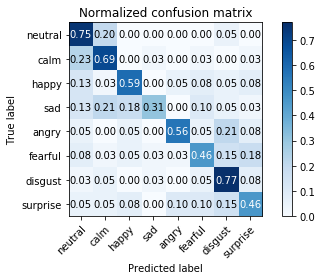

In [28]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
 
clf =  (OneVsOneClassifier(svm.SVC(kernel = 'rbf', gamma = 'auto',C=1,class_weight = 'balanced',tol = 1e-15, verbose = True))).fit(tr_fea, tr_lab)

print('Training Score',clf.score(tr_fea, tr_lab)) 

test_fea_transformed = scaler.transform(test_fea)
print('Score',clf.score(test_fea_transformed, test_lab)) 
  
test_lab_pred = clf.predict(test_fea_transformed)
acc = accuracy_score(test_lab_pred,test_lab)
print('Accuracy',acc)
print(test_lab_pred)
print(test_lab)
cm = confusion_matrix(test_lab_pred, test_lab)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print(confusion_matrix(test_lab_pred, test_lab))
print(cm) 


plot_confusion_matrix(test_lab, test_lab_pred, classes=emotionclassname, normalize=True,
                      title='Normalized confusion matrix')

plt.savefig('norm4emo.png')


In [29]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

 
 

In [30]:
emotionclassname = np.asarray(['neutral','calm', 'happy',  'sad', 'angry' ,'fearful', 'disgust', 'surprise'])
 